# Prework

Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

Chargeons le dataframe

In [3]:
data = pd.read_csv('../raw_data/data_full.csv')

In [4]:
data.owners.value_counts()

0-20000                18530
20000-50000             3018
50000-100000            1675
100000-200000           1367
200000-500000           1240
500000-1000000           493
1000000-2000000          286
2000000-5000000          191
5000000-10000000          42
10000000-20000000         20
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [5]:
data.tail(20)

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,...,voice_control,voxel,walking_simulator,war,wargame,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
26848,1060770,"Die, zombie sausage, die!",2019-04-24,1,AuroraCorp,Aurora software,windows,0,Single-player;Steam Leaderboards,Action;Indie;Early Access,Early Access;Action;Indie,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
26849,1060870,"Hello, World.",2019-04-19,1,Meatball Parm Games,Meatball Parm Games,windows,0,Single-player,Casual;Indie,Casual;Indie,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26850,1061230,Scream of the Viking 3,2019-04-16,1,LTrust,LTrust,windows,0,Single-player,Action;Adventure;Casual;Indie;Simulation,Action;Indie;Casual,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26851,1061470,Nyasha Valkyrie,2019-04-19,1,Zloy Krot Studio,IR Studio,windows,0,Single-player;Steam Achievements,Casual;Indie,Sexual Content;Indie;Casual,32,7,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26852,1062120,Peas Adventure,2019-04-18,1,Artur Rezende,Artur Rezende,windows,0,Single-player;Full controller support,Casual;Indie,Casual;Indie,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26853,1062240,地铁：恐怖末班车,2019-04-25,0,QZQ Studio,"H.P.Y.S,LLC",windows,0,Single-player,Action;Adventure;Indie;RPG,Action;Adventure;RPG,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26854,1062670,Blacksmith Run,2019-04-19,1,Skull Box Games,КиКо,windows,0,Single-player,Indie,Indie,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26855,1062880,Scream of the Viking REDUX,2019-04-18,1,LTrust,LTrust,windows,0,Single-player,Action;Adventure;Casual;Indie,Action;Indie;Casual,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26856,1063060,MonteCube Dodge,2019-04-22,1,MonteCube,MonteCube,windows,0,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Action;Indie,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26857,1063230,6120,2019-04-19,1,indie_games_studio,indie_games_studio,windows,0,Single-player,Adventure;Indie,Indie;Adventure;Horror,0,6,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0


In [6]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(f'"{key}"')

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"required_age"
"categories"
"genres"
"steamspy_tags"
"achievements"
"positive_ratings"
"negative_ratings"
"average_playtime"
"median_playtime"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"movies"
"pc_requirements"
"mac_requirements"
"linux_requirements"
"minimum"
"recommended"
"website"
"support_url"
"support_email"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchm

# Retrait des colonnes non pertinentes

Les colonnes de requirements sont abandonnées car peu pertinantes dans l'analyse du prix et des owners.

In [7]:
data.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum', 'recommended'], inplace=True)

De même les colonnes de support sont peu pertinantes pour nous.

In [8]:
data.drop(columns=['support_email', 'support_url'], inplace=True)

La colonne "movies" serait un peu trop complexe à analyser pour le moment, puisque qu'elle comprend des vidéos, et est très incomplète. 

In [9]:
data.drop(columns=['movies'], inplace=True)

La colonne "age" semble très incomplète. C'est pourquoi nous ne la prendront pas en compte.

In [10]:
data['required_age'].value_counts()

0     26284
18      307
16      187
12       67
7        12
3        11
Name: required_age, dtype: int64

In [11]:
data.drop(columns=['required_age'], inplace=True)

# Analyse des colonnes restantes

Il n'y a presque plus de valeurs manquantes et/ou nulles. (à l'exception de la colonne 'website')

In [12]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

steam_appid , 0
name , 0
release_date , 0
english , 0
developer , 0
publisher , 0
platforms , 0
categories , 0
genres , 0
steamspy_tags , 0
achievements , 0
positive_ratings , 0
negative_ratings , 0
average_playtime , 0
median_playtime , 0
owners , 0
price , 0
detailed_description , 0
about_the_game , 0
short_description , 0
header_image , 0
screenshots , 0
background , 0
website , 8988
1980s , 0
1990s , 0
2.5d , 0
2d , 0
2d_fighter , 0
360_video , 0
3d , 0
3d_platformer , 0
3d_vision , 0
4_player_local , 0
4x , 0
6dof , 0
atv , 0
abstract , 0
action , 0
action_rpg , 0
action_adventure , 0
addictive , 0
adventure , 0
agriculture , 0
aliens , 0
alternate_history , 0
america , 0
animation_&_modeling , 0
anime , 0
arcade , 0
arena_shooter , 0
artificial_intelligence , 0
assassin , 0
asynchronous_multiplayer , 0
atmospheric , 0
audio_production , 0
bmx , 0
base_building , 0
baseball , 0
based_on_a_novel , 0
basketball , 0
batman , 0
battle_royale , 0
beat_em_up , 0
beautiful , 0
benchmark 

Transformons la colonne 'release_date' en datetime

In [13]:
data['release_date'] = data['release_date'].astype('datetime64')

# Observations des min/max

Observons les valeurs des prix

In [14]:
data.sort_values(by = 'price', ascending = False).head()[['price', 'name']]

,price,name
20909,421.99,ADR-Labelling Game
12882,303.99,GameMaker Studio 2 UWP
9861,209.99,Houdini Indie
25363,154.99,Bible Test
10736,154.99,Silhouette


le jeux le plus cher semble être une valeur erronée, retirons la ligne.

In [15]:
data = data.drop(index=20909)

In [16]:
data.dtypes

steam_appid                                   int64
name                                         object
release_date                         datetime64[ns]
english                                       int64
developer                                    object
publisher                                    object
platforms                                    object
categories                                   object
genres                                       object
steamspy_tags                                object
achievements                                  int64
positive_ratings                              int64
negative_ratings                              int64
average_playtime                              int64
median_playtime                               int64
owners                                       object
price                                       float64
detailed_description                         object
about_the_game                               object
short_descri

# Création de nouvelles features

Rajoutons les min, max, medians pour les owners, ainsi qu'une colonne 'revenue' basée sur la mediane des owners et le prix

In [17]:
tmp = pd.DataFrame()
tmp[['lower', 'upper']] = data['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,10000000,20000000,15000000.0
...,...,...,...
26863,0,20000,10000.0
26864,0,20000,10000.0
26865,0,20000,10000.0
26866,0,20000,10000.0


In [18]:
data['owner_median'] = tmp['owner_median']
data['owner_lower'] = tmp['lower']
data['owner_upper'] = tmp['upper']

Create a column "has_a_website"

In [19]:
data.website = data['website'].fillna(0)

In [20]:
condition = lambda x: 1 if x != 0 else 0

In [21]:
data['has_a_website'] = data.website.apply(condition)

Création d'une colonne nombre total de review

In [22]:
data['nb_review'] = data['positive_ratings'] + data['negative_ratings']

# Etude de l'intervalle 0-20000

In [23]:
new_data = data[data["owner_median"] == 10000]
new_data.shape

(18529, 400)

<AxesSubplot:>

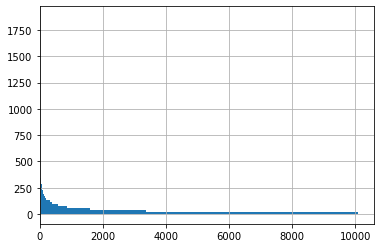

In [24]:
new_data.nb_review.hist(bins=100, orientation='horizontal',)

(array([1.7749e+04, 6.1900e+02, 1.2500e+02, 2.6000e+01, 6.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.8890e+02, 3.7680e+02, 5.6470e+02, 7.5260e+02,
        9.4050e+02, 1.1284e+03, 1.3163e+03, 1.5042e+03, 1.6921e+03,
        1.8800e+03]),
 <BarContainer object of 10 artists>)

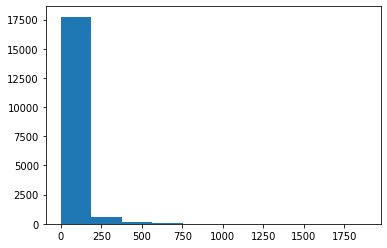

In [25]:
plt.hist(new_data.nb_review)

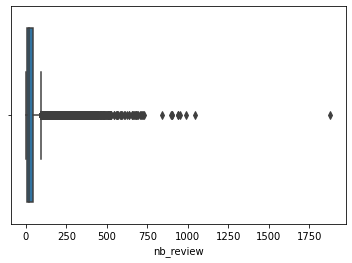

In [26]:
ax = sns.boxplot(data=new_data,x="nb_review", )

[array([6., 1.]), array([42., 96.])]

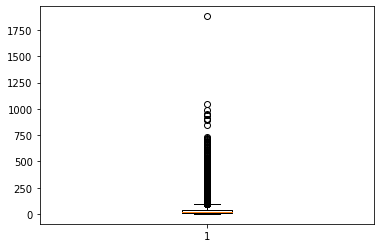

In [27]:
B = plt.boxplot(new_data.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [28]:
new_data = new_data.sort_values(by='nb_review', ascending=False)

In [29]:
new_data.head(11)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review
20828,819500,Fear The Wolves,2019-02-06,1,Vostok Games,Focus Home Interactive,windows,Multi-player;Online Multi-Player;Online Co-op;...,Action;Adventure;Massively Multiplayer,Battle Royale;FPS;Survival,22,928,952,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,1880
23965,921390,武林志（Wushu Chronicles）,2019-04-09,0,JiangHu Studio,Snail Games,windows,Single-player,Adventure;Casual;Indie;RPG;Simulation,RPG;Indie;Adventure,0,616,430,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,0,1046
2922,295950,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,Action;RPG;Fighting,0,664,323,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,0,987
9096,477730,Eador. Imperium,2017-01-27,1,Snowbird Games,Snowbird Games,windows,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Strategy,Strategy;Indie;RPG,32,787,166,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,953
9586,495990,True Love ～Confide to the Maple～,2016-10-05,1,SP-time,SP-time,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Visual Novel;Casual;Indie,24,773,167,152,162,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,940
14115,623080,planetarian HD,2017-05-08,0,VisualArts/Key,VisualArts,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,Visual Novel;Anime;Casual,21,927,10,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,0,937
12389,571880,Angels with Scaly Wings,2017-01-31,1,Radical Phi,Radical Phi,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Violent;Adventure;Indie;RPG;Simulation,Dragons;Visual Novel;Dating Sim,63,878,25,880,880,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,903
2478,280010,Gunjitsu,2015-07-31,1,Decent Machine,Beatnik Games,windows;mac,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Indie;Early Access,Early Access;Action;Indie,19,724,179,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,903
2842,293220,H-Hour: World's Elite,2015-05-19,1,SOF Studios Ltd,SOF Studios Ltd,windows,Multi-player;Steam Achievements;Full controlle...,Action;Indie;Early Access,Early Access;Action;Indie,1,498,397,0,0,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,895
18965,766280,A Light in the Dark,2018-06-15,1,CreSpirit;Storia;Narrator,Sekai Project,windows;mac,Single-player;Steam Achievements;Steam Trading...,Violent;Gore;Casual;Indie,Gore;Indie;Visual Novel,12,799,45,310,310,...,0,0,0,0,0,0,0,0,0,0,10000.0,0,20000,1,844


In [30]:
alpha = round(20000/96)
alpha

208

In [31]:
new_data['owner_estimated'] = new_data['nb_review'] * alpha

In [32]:
new_data[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
20828,Fear The Wolves,1880,391040
23965,武林志（Wushu Chronicles）,1046,217568
2922,新流星搜劍錄,987,205296
9096,Eador. Imperium,953,198224
9586,True Love ～Confide to the Maple～,940,195520
14115,planetarian HD,937,194896
12389,Angels with Scaly Wings,903,187824
2478,Gunjitsu,903,187824
2842,H-Hour: World's Elite,895,186160
18965,A Light in the Dark,844,175552


In [33]:
new_data[['name', 'nb_review', 'owner_estimated']].tail(3)

,name,nb_review,owner_estimated
17136,Pray for Death,1,208
14368,Gunball,1,208
15655,The Western Hunter,1,208


In [34]:
condition = lambda x: 20000 if x > 20000 else x

In [35]:
new_data['owner_estimated'] = new_data.owner_estimated.apply(condition)

In [36]:
new_data[['name', 'nb_review', 'owner_estimated']].head(2500)

,name,nb_review,owner_estimated
20828,Fear The Wolves,1880,20000
23965,武林志（Wushu Chronicles）,1046,20000
2922,新流星搜劍錄,987,20000
9096,Eador. Imperium,953,20000
9586,True Love ～Confide to the Maple～,940,20000
...,...,...,...
11114,Grimm: Dark Legacy,79,16432
15625,The Brave Mouse,79,16432
24961,Maytroid. I swear it's a nice game too,79,16432
13534,A Girls Fabric Face,79,16432


# Etude de l'intervalle 20000-50000

In [37]:
new_data2 = data[data["owner_median"] == 35000]

<AxesSubplot:>

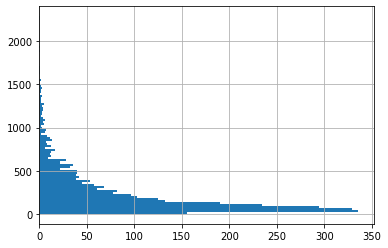

In [38]:
new_data2.nb_review.hist(bins=100, orientation='horizontal',)

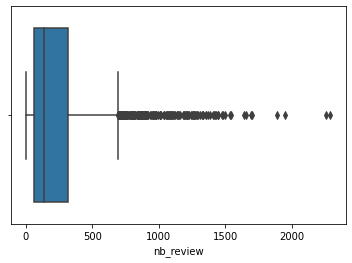

In [39]:
ax = sns.boxplot(data=new_data2,x="nb_review")

[array([64.,  1.]), array([314.75, 690.  ])]

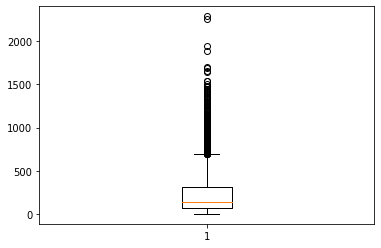

In [40]:
B = plt.boxplot(new_data2.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [41]:
new_data2 = new_data2.sort_values(by='nb_review', ascending=False)

In [42]:
alpha = round(30000/690)
alpha

43

In [43]:
new_data2['owner_estimated'] = (new_data2['nb_review'] * alpha) + 20000

In [44]:
condition = lambda x: 50000 if x > 50000 else x

In [45]:
new_data2['owner_estimated'] = new_data2.owner_estimated.apply(condition)

In [46]:
new_data2[['name', 'nb_review', 'owner_estimated']].tail(200)

,name,nb_review,owner_estimated
13512,My Own Little Planet,26,21118
25831,Offendron Warrior,26,21118
737,Ironclads: Anglo Russian War 1866,26,21118
3008,Millennium 4 - Beyond Sunset,26,21118
8116,X-17,26,21118
20536,Starman's VR Experience,26,21118
12558,Mosaics Galore 2,26,21118
6577,Tactical Soccer The New Season,26,21118
5491,Dale Hardshovel HD,26,21118
18031,Kokoda VR,26,21118


# Etude 50000-100000

In [47]:
new_data3 = data[data["owner_median"] == 75000]

<AxesSubplot:>

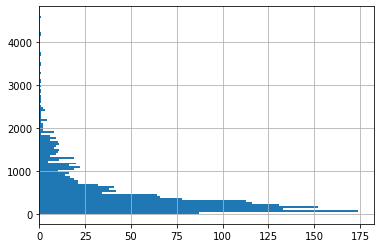

In [48]:
new_data3.nb_review.hist(bins=100, orientation='horizontal',)

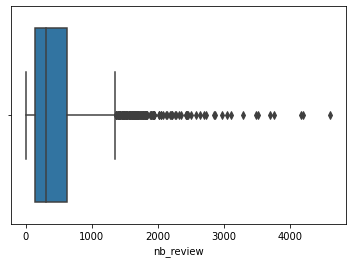

In [49]:
ax = sns.boxplot(data=new_data3,x="nb_review")

[array([146.,   3.]), array([ 629.5, 1350. ])]

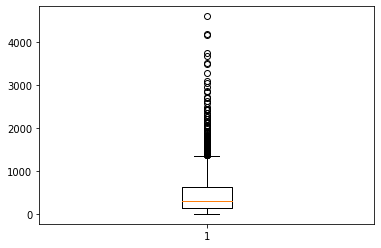

In [50]:
B = plt.boxplot(new_data3.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [51]:
new_data3 = new_data3.sort_values(by='nb_review', ascending=False)

In [52]:
alpha = round(50000/1350)
alpha

37

In [53]:
new_data3['owner_estimated'] = (new_data3['nb_review'] * alpha) + 50000

In [54]:
condition = lambda x: 100000 if x > 100000 else x

In [55]:
new_data3['owner_estimated'] = new_data3.owner_estimated.apply(condition)

In [56]:
new_data3[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
14128,Timen runner,67,52479
14130,POBEDA,67,52479
13720,Crazy Buggy Racing,66,52442
12722,Tourists Kidnapped a Little Bear,66,52442
5942,Lilly and Sasha: Guardian Angels,66,52442
9757,The Sunset,66,52442
1127,Avernum 4,65,52405
7426,Army of Tentacles: (Not) A Cthulhu Dating Sim,65,52405
12524,My Super Tower 2,64,52368
8846,Vintage VR,64,52368


# Etude 100000-200000

In [57]:
new_data4 = data[data["owner_median"] == 150000]

<AxesSubplot:>

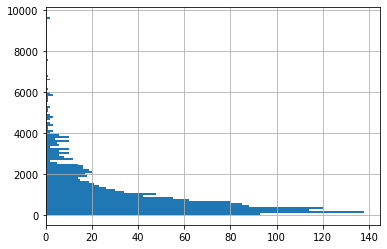

In [58]:
new_data4.nb_review.hist(bins=100, orientation='horizontal',)

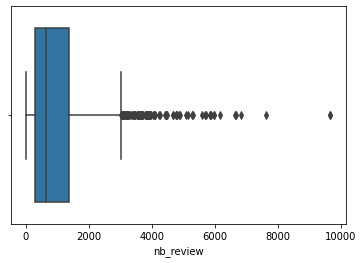

In [59]:
ax = sns.boxplot(data=new_data4,x="nb_review")

[array([294.5,  10. ]), array([1391., 3027.])]

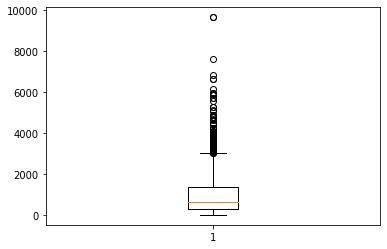

In [60]:
B = plt.boxplot(new_data4.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [61]:
new_data4 = new_data4.sort_values(by='nb_review', ascending=False)

In [62]:
alpha = round(100000/3027)
alpha

33

In [63]:
new_data4['owner_estimated'] = (new_data4['nb_review'] * alpha) + 100000

In [64]:
condition = lambda x: 200000 if x > 200000 else x

In [65]:
new_data4['owner_estimated'] = new_data4.owner_estimated.apply(condition)

In [66]:
new_data4[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
13437,The Evil Within 2,9661,200000
12848,Sonic Mania,9653,200000
4755,SURVIVAL,7625,200000
5392,Hook,6829,200000
6592,Rabi-Ribi,6663,200000
5148,Tree of Life,6636,200000
11010,Zup!,6176,200000
25744,古剑奇谭三(Gujian3),5980,200000
17106,Total War Saga: THRONES OF BRITANNIA,5965,200000
5295,Battle Brothers,5890,200000


# Etude 200000-500000 

In [67]:
new_data5 = data[data["owner_median"] == 350000]

<AxesSubplot:>

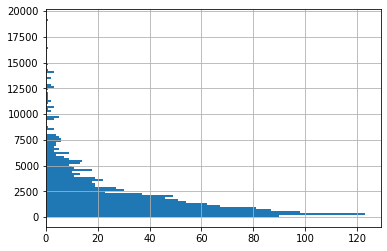

In [68]:
new_data5.nb_review.hist(bins=100, orientation='horizontal',)

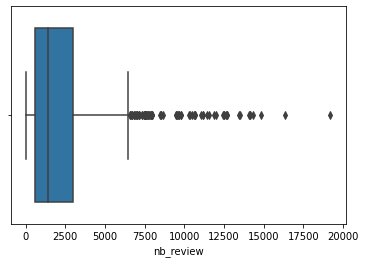

In [69]:
ax = sns.boxplot(data=new_data5,x="nb_review")

[array([592.75,  19.  ]), array([2974.25, 6424.  ])]

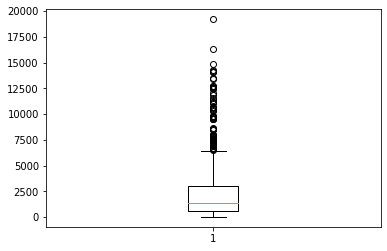

In [70]:
B = plt.boxplot(new_data5.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [71]:
new_data5 = new_data5.sort_values(by='nb_review', ascending=False)

In [72]:
alpha = round(300000/6424)
alpha

47

In [73]:
new_data5['owner_estimated'] = (new_data5['nb_review'] * alpha) + 200000

In [74]:
condition = lambda x: 500000 if x > 500000 else x

In [75]:
new_data5['owner_estimated'] = new_data5.owner_estimated.apply(condition)

In [76]:
new_data5[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
989,Memoir '44 Online,296,213912
936,Steel Storm: Burning Retribution,296,213912
5756,The Tower Of Elements,293,213771
10835,Turbo Pug 3D,291,213677
9493,Deep Space Dash,291,213677
7800,AI: Rampage,291,213677
7460,White Mirror,289,213583
3803,Horizon Shift,288,213536
2814,DarkEnd,287,213489
6013,Atonement: Scourge of Time,282,213254


# Etude 500000-1000000 

In [77]:
new_data6 = data[data["owner_median"] == 750000]

<AxesSubplot:>

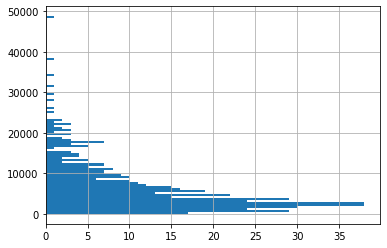

In [78]:
new_data6.nb_review.hist(bins=100, orientation='horizontal',)

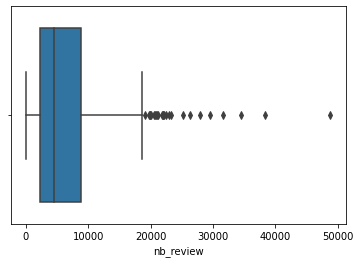

In [79]:
ax = sns.boxplot(data=new_data6,x="nb_review")

[array([2311.,   23.]), array([ 8883., 18605.])]

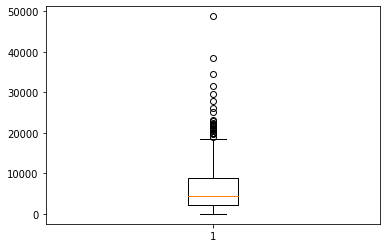

In [80]:
B = plt.boxplot(new_data6.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [81]:
new_data6 = new_data6.sort_values(by='nb_review', ascending=False)

In [82]:
alpha = round(500000/18605)
alpha

27

In [83]:
new_data6['owner_estimated'] = (new_data6['nb_review'] * alpha) + 500000

In [84]:
condition = lambda x: 1000000 if x > 1000000 else x

In [85]:
new_data6['owner_estimated'] = new_data6.owner_estimated.apply(condition)

In [86]:
new_data6[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
10670,NieR:Automata™,48801,1000000
5961,Firewatch,38410,1000000
11692,Far Cry® 5,34454,1000000
7892,Conan Exiles,31595,1000000
6325,Squad,29547,1000000
7834,Friday the 13th: The Game,27967,1000000
8081,Watch_Dogs® 2,26271,1000000
3040,Miscreated,25158,1000000
11778,Life is Strange: Before the Storm,23225,1000000
13743,Quake Champions,22977,1000000


# Création nouvelles features (2)

In [87]:
test = new_data[['steam_appid', 'owner_estimated']]
test2 = new_data2[['steam_appid', 'owner_estimated']]
test3 = new_data3[['steam_appid', 'owner_estimated']]
test4 = new_data4[['steam_appid', 'owner_estimated']]
test5 = new_data5[['steam_appid', 'owner_estimated']]
test6 = new_data6[['steam_appid', 'owner_estimated']]
test_final = pd.concat([test, test2, test3, test4, test5, test6])

In [88]:
data.shape

(26867, 400)

In [89]:
data = data.merge(test_final, on='steam_appid', how="outer")

In [90]:
data.shape

(26867, 401)

In [91]:
data['owner_estimated'] = data['owner_estimated'].fillna(value=data.owner_median)

Création de la colonne revenu

In [92]:
data['revenu'] = data.owner_estimated * data.price

Création d'une colonne "1" pour traquer le nombre de jeux

In [93]:
data['1'] = 1

# Création notation des developers

In [94]:
test = data.groupby(by=['developer'], axis=0, as_index=False).sum()

In [95]:
test

,developer,steam_appid,english,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,1980s,1990s,2.5d,2d,2d_fighter,360_video,...,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1
0,#workshop,1002560,0,9,653,29,0,0,2.89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,0,682,20000.0,57800.00,1
1,'What Day is it?' Games,764880,1,0,2,0,0,0,5.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,1,2,416.0,2159.04,1
2,(STCG) Smoker The Car Game,927580,1,0,2,2,0,0,0.79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,1,4,832.0,657.28,1
3,+7 Software,459830,1,90,41,5,0,0,5.49,0,0,0,14,0,0,...,0,0,0,0,0,17,0,10000.0,0,20000,1,46,9568.0,52528.32,1
4,"+Mpact Games, LLC.",349510,1,18,74,16,0,0,5.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,1,90,18720.0,97156.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17042,魂动天下,768020,1,0,3,0,0,0,1.69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,1,3,624.0,1054.56,1
17043,魔力乐章,745820,0,0,6,1,0,0,2.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,1,7,1456.0,3043.04,1
17044,魔术工坊,1014020,1,7,44,10,0,0,1.69,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10000.0,0,20000,0,54,11232.0,18982.08,1
17045,黄昏フロンティア,1678220,1,20,1348,141,264,264,33.48,0,0,0,49,101,0,...,0,0,0,0,0,0,0,45000.0,20000,70000,1,1489,64144.0,1172374.56,2


In [96]:
test['rating_developer'] = (test.positive_ratings - 0.6 * test.negative_ratings) / test['1']

In [97]:
test['popularity_developer'] = (test.positive_ratings + 0.3 * test.negative_ratings) / test['1']

In [98]:
test2 = test[['developer', 'rating_developer', 'popularity_developer']]

In [99]:
data = data.merge(test2, on='developer')

Création notation publisher

In [100]:
test = data.groupby(by=['publisher'], axis=0, as_index=False).sum()

In [101]:
test

,publisher,steam_appid,english,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,1980s,1990s,2.5d,2d,2d_fighter,360_video,...,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,rating_developer,popularity_developer
0,,3578490,6,172,4357,599,932,733,8.57,0,0,0,15,0,0,...,0,0,0,0,0,825000.0,520000,1130000,3,4956,673538.0,166629.98,6,2818.600,3194.200
1,Milestone S.r.l.,456780,1,22,64,32,0,0,6.99,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,1,96,19968.0,139576.32,1,226.648,338.536
2,AFBIK Studio,2861170,2,59,111,35,0,0,2.37,0,0,0,0,0,0,...,0,0,0,0,0,30000.0,0,60000,0,146,27696.0,21879.84,3,90.000,121.500
3,AYE Technology,659100,1,0,6,18,0,0,2.79,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,0,24,4992.0,13927.68,1,-4.600,6.800
4,Anea_Duo_Dev,832420,1,0,5,4,0,0,7.19,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,0,9,1872.0,13459.68,1,44.450,69.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14307,飞鹰互娱,773490,0,0,10,1,0,0,2.89,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,1,11,2288.0,6612.32,1,9.400,10.300
14308,香港商河洛互動娛樂股份有限公司;方块游戏,952860,0,71,851,593,0,0,13.50,0,0,0,0,0,0,...,0,0,0,0,0,35000.0,20000,50000,1,1444,50000.0,675000.00,1,932.800,1387.600
14309,魂动天下,768020,1,0,3,0,0,0,1.69,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,1,3,624.0,1054.56,1,3.000,3.000
14310,魔力乐章,745820,0,0,6,1,0,0,2.09,0,0,0,0,0,0,...,0,0,0,0,0,10000.0,0,20000,1,7,1456.0,3043.04,1,5.400,6.300


In [102]:
test['rating_publisher'] = (test.positive_ratings - 0.6 * test.negative_ratings) / test['1']

In [103]:
test['popularity_publisher'] = (test.positive_ratings + 0.3 * test.negative_ratings) / test['1']

In [104]:
test['nb_game'] = test['1']

In [105]:
test2 = test[['publisher', 'rating_publisher', 'popularity_publisher', 'nb_game']]

In [106]:
data = data.merge(test2, on='publisher')

In [107]:
data['popularity'] = (data.popularity_developer + data.popularity_publisher) / 2

In [108]:
data['rating'] = (data.rating_developer + data.rating_publisher) / 2

In [109]:
test_nathan = pd.read_csv("../raw_data/df_with_score.csv")

In [110]:
test_nathan2 = test_nathan[['score_descriptif', 'steam_appid']]

In [111]:
data = data.merge(test_nathan2, on='steam_appid')

In [112]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,rating_developer,popularity_developer,rating_publisher,popularity_publisher,nb_game,popularity,rating,score_descriptif
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,...,10000000,20000000,0,127873,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,6
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,...,5000000,10000000,1,3814,7500000.0,2.992500e+07,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,7
2,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,...,5000000,10000000,1,28855,7500000.0,5.392500e+07,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,12
3,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,...,10000000,20000000,0,13559,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,7
4,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,...,10000000,20000000,1,70321,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,1060770,"Die, zombie sausage, die!",2019-04-24,1,AuroraCorp,Aurora software,windows,Single-player;Steam Leaderboards,Action;Indie;Early Access,Early Access;Action;Indie,0,1,0,0,0,...,0,20000,0,1,208.0,1.643200e+02,1,1.0,1.000,1.000000,1.000000,1,1.000000,1.000000,2
26863,1060870,"Hello, World.",2019-04-19,1,Meatball Parm Games,Meatball Parm Games,windows,Single-player,Casual;Indie,Casual;Indie,0,0,1,0,0,...,0,20000,0,1,208.0,6.011200e+02,1,-0.6,0.300,-0.600000,0.300000,1,0.300000,-0.600000,4
26864,1063060,MonteCube Dodge,2019-04-22,1,MonteCube,MonteCube,windows,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Action;Indie,0,2,0,0,0,...,0,20000,0,2,416.0,8.694400e+02,1,2.0,2.000,2.000000,2.000000,1,2.000000,2.000000,1
26865,1064060,The Mystery of Bikini Island,2019-04-24,1,Velvet Paradise Games,Velvet Paradise Games,windows,Single-player,Adventure;Casual;Indie;RPG;Early Access,Early Access;Adventure;Sexual Content,0,3,0,0,0,...,0,20000,1,3,624.0,4.929600e+02,1,3.0,3.000,3.000000,3.000000,1,3.000000,3.000000,1


# Enregistrement du csv

In [113]:
data.to_csv(r'data_clean.csv', index = False)

# Selection de la range du dataset

In [114]:
data_indé_1 = data[data['owner_median'] == 10000]
#data_indé_2 = data[data['owner_median'] == 35000]
#data_indé = data_indé[data_indé['nb_game'] == 1]
#data_indé = pd.concat([data_indé_1, data_indé_2], ignore_index=True)
data_indé = data_indé_1

# Création du dataset final

In [115]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(f'"{key}"')

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"categories"
"genres"
"steamspy_tags"
"achievements"
"positive_ratings"
"negative_ratings"
"average_playtime"
"median_playtime"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"website"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchmark"
"bikes"
"blood"
"board_game"
"bowling"
"building"
"bullet_hell"
"bullet_time"
"crpg"
"capitalism"
"card_game"
"cartoon"
"cartoony"


In [116]:
data_ = pd.read_csv('../raw_data/df_with_topics.csv')
data__ = pd.read_csv('../raw_data/df_with_20_topics.csv')
data___ = pd.read_csv('../raw_data/df_with_25_topics.csv')

In [117]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,...,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,rating_developer,popularity_developer,rating_publisher,popularity_publisher,nb_game,popularity,rating,score_descriptif
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,...,10000000,20000000,0,127873,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,6
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,...,5000000,10000000,1,3814,7500000.0,2.992500e+07,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,7
2,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,...,5000000,10000000,1,28855,7500000.0,5.392500e+07,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,12
3,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,...,10000000,20000000,0,13559,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,7
4,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,...,10000000,20000000,1,70321,15000000.0,1.078500e+08,1,105245.3,115000.625,202934.608333,226793.570833,24,170897.097917,154089.954167,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,1060770,"Die, zombie sausage, die!",2019-04-24,1,AuroraCorp,Aurora software,windows,Single-player;Steam Leaderboards,Action;Indie;Early Access,Early Access;Action;Indie,0,1,0,0,0,...,0,20000,0,1,208.0,1.643200e+02,1,1.0,1.000,1.000000,1.000000,1,1.000000,1.000000,2
26863,1060870,"Hello, World.",2019-04-19,1,Meatball Parm Games,Meatball Parm Games,windows,Single-player,Casual;Indie,Casual;Indie,0,0,1,0,0,...,0,20000,0,1,208.0,6.011200e+02,1,-0.6,0.300,-0.600000,0.300000,1,0.300000,-0.600000,4
26864,1063060,MonteCube Dodge,2019-04-22,1,MonteCube,MonteCube,windows,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Action;Indie,0,2,0,0,0,...,0,20000,0,2,416.0,8.694400e+02,1,2.0,2.000,2.000000,2.000000,1,2.000000,2.000000,1
26865,1064060,The Mystery of Bikini Island,2019-04-24,1,Velvet Paradise Games,Velvet Paradise Games,windows,Single-player,Adventure;Casual;Indie;RPG;Early Access,Early Access;Adventure;Sexual Content,0,3,0,0,0,...,0,20000,1,3,624.0,4.929600e+02,1,3.0,3.000,3.000000,3.000000,1,3.000000,3.000000,1


In [118]:
data_test = data_indé[["steam_appid",
"english",
"price",
"has_a_website",
"nb_review",
"owner_estimated",
"rating",     
"popularity",
"score_descriptif",
                      "average_playtime",
                      "median_playtime"]]

In [119]:
data_final = data__.merge(data_test,  on='steam_appid')

In [120]:
data_final

,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,...,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,has_a_website,nb_review,owner_estimated,rating,popularity,score_descriptif,average_playtime,median_playtime
0,4290,RACE: Caterham Expansion,racing simulation relaxing realistic real_time...,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.015822,0.287142,...,0.015822,0.428065,0.015822,0.015822,0.015822,1,3.99,1,6,1248.0,424.233333,517.758333,4,0,0
1,4900,Zen of Sudoku,casual puzzle 1980s relaxing realistic,0.015666,0.307211,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,...,0.015666,0.015666,0.015666,0.015666,0.410797,1,0.00,1,139,20000.0,22124.365000,23631.392500,3,0,0
2,7340,Azada,casual puzzle 1980s relaxing realistic,0.015666,0.307211,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,0.015666,...,0.015666,0.015666,0.015666,0.015666,0.410797,1,6.99,1,12,2496.0,7.012399,9.197810,1,0,0
3,9960,Haunted House™,adventure 1980s relaxing realistic real_time_w...,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,0.015546,...,0.015546,0.015546,0.015546,0.015546,0.704628,1,4.79,1,22,4576.0,215.087500,263.378125,3,0,0
4,9970,Star Raiders,action space 1980s realistic real_time_with_pause,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,0.016158,...,0.275846,0.016158,0.016158,0.016158,0.433305,1,6.99,1,29,6032.0,209.787500,263.028125,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18524,1065230,Room of Pandora,adventure casual puzzle 1980s relaxing,0.015694,0.701810,0.015694,0.015694,0.015694,0.015694,0.015694,0.015694,0.015694,0.015694,0.015694,0.015694,...,0.015694,0.015694,0.015694,0.015694,0.015694,1,2.09,0,3,624.0,3.000000,3.000000,1,0,0
18525,1065570,Cyber Gun,action adventure fps 3d_platformer fast_paced,0.016478,0.016478,0.519926,0.016478,0.183470,0.016478,0.016478,0.016478,0.016478,0.016478,0.016478,0.016478,...,0.016478,0.016478,0.016478,0.016478,0.016478,1,1.69,0,9,1872.0,13.366667,16.816667,3,0,0
18526,1065650,Super Star Blast,action casual 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,...,0.015483,0.015483,0.015483,0.015483,0.705831,1,3.99,1,1,208.0,4.600000,10.450000,5,0,0
18527,1066700,New Yankee 7: Deer Hunters,casual adventure 1980s relaxing realistic,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,0.015466,...,0.015466,0.015466,0.015466,0.015466,0.706139,1,5.19,1,2,416.0,23.463964,29.301802,2,0,0


# Enregistrement du dataset final

In [121]:
data_final.to_csv(r'data_final_indé_small.csv', index = False)

# Encodage des certaines colonnes

Encodage des plateformes

In [122]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])

In [123]:
df1 = pd.DataFrame(platform_encoded)

In [124]:
data2 = data.join(df1)

In [125]:
data2.drop(columns='platforms', inplace= True)